# Finite Element
## December 8th, 2022
### Overview: Using finite element methods to approximate solutions to an ODE

In [1]:
import scipy as sp
from scipy.sparse import spdiags, diags, csr_matrix
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [2]:
def a(i,j,h=[]):
    """a function from lab manual; i and j are indices of the phi functions, h is array of grid spacing"""
    eps = 0.02
    if j == i + 1:  return (eps/h[i+1]) + 0.5
    elif j == i:    return -(eps/h[i]) - (eps/h[i+1])
    elif j == i - 1:return (eps/h[i]) - 0.5
    else: return 0

def l(j,h=[]):
    """l function from lab manual; j is index of phi function and h is array of grid spacing"""
    return -0.5*(h[j]+h[j+1])

In [3]:
#doing 100 subintervals; defining consts alpha and beta
n = 100
alpha, beta = 2, 4

#grid spacing array
h = 0.01*np.ones(n+1)
#diagonals of A matrix
above_diag= np.concatenate(( np.array([0]), np.array([a(i,i-1,h) for i in range(2,n+1)]) ))
main_diag = np.concatenate(( np.array([1]), np.array([a(i,i,h) for i in range(1,n)]),np.array([1]) ))
below_diag= np.concatenate(( np.array([a(i,i+1,h) for i in range(0,n-1)]), np.array([0]) ))
#creating A as sparse matrix
A = csr_matrix(diags([above_diag,main_diag,below_diag],[1,0,-1]))

#phi vector, solving for K vector
PHI = np.concatenate(( np.array([alpha]), np.array([l(i,h) for i in range(1,n)]), np.array([beta])    ))
K = spsolve(A,PHI)

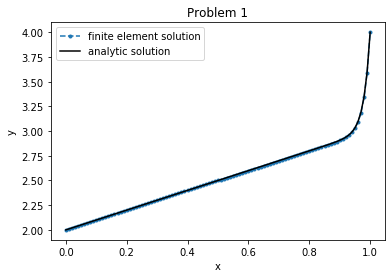

In [6]:
#grid, epsilon
x = np.linspace(0,1,101)
eps = 0.02

#analytic solution
ana = alpha + x + (beta - alpha -1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))

#plotting
plt.plot(x,K,'--.',label='finite element solution')
plt.plot(x,ana,label='analytic solution',color='k')
plt.title('Problem 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

In [7]:
#creating an even grid and its spacing, clustered grid and its spacing
even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1./8)
even_h = (even_grid[1]-even_grid[0])*np.ones(15)
clustered_h = np.concatenate(( np.array([0]), (np.roll(clustered_grid,-1) - clustered_grid)[:-1] ))

#14 subintervals
n = 14
#even diags
even_above_diag= np.concatenate(( np.array([0]), np.array([a(i,i-1,even_h) for i in range(2,n+1)]) ))
even_main_diag = np.concatenate(( np.array([1]), np.array([a(i,i,even_h) for i in range(1,n)]),np.array([1]) ))
even_below_diag= np.concatenate(( np.array([a(i,i+1,even_h) for i in range(0,n-1)]), np.array([0]) ))

#clustered diag
clustered_above_diag= np.concatenate(( np.array([0]), np.array([a(i,i-1,clustered_h) for i in range(2,n+1)]) ))
clustered_main_diag = np.concatenate(( np.array([1]), np.array([a(i,i,clustered_h) for i in range(1,n)]),np.array([1]) ))
clustered_below_diag= np.concatenate(( np.array([a(i,i+1,clustered_h) for i in range(0,n-1)]), np.array([0]) ))

#creating the even A matrix and its corresponding phi vector
even_A = csr_matrix(diags([even_above_diag,even_main_diag,even_below_diag],[1,0,-1]))
even_PHI = np.concatenate(( np.array([alpha]), np.array([l(i,even_h) for i in range(1,n)]), np.array([beta])    ))

#creating the clustered A matrix and its corresponding phi vector
clustered_A = csr_matrix(diags([clustered_above_diag,clustered_main_diag,clustered_below_diag],[1,0,-1]))
clustered_PHI = np.concatenate(( np.array([alpha]), np.array([l(i,clustered_h) for i in range(1,n)]), np.array([beta])    ))

#solving for both's K vectors
even_K = spsolve(even_A,even_PHI)
clustered_K = spsolve(clustered_A,clustered_PHI)

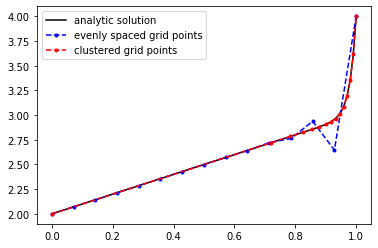

In [8]:
#plotting
x = np.linspace(0,1,101)
ana = alpha + x + (beta - alpha -1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))
plt.plot(x,ana,color='k',label='analytic solution')
plt.plot(even_grid,even_K,'--.',color='b',label='evenly spaced grid points')
plt.plot(clustered_grid,clustered_K,'--.',color='r',label='clustered grid points')
plt.legend()
plt.show()

In [9]:
clustered_h

array([0.        , 0.71900845, 0.06507582, 0.04076415, 0.03020154,
       0.0241856 , 0.02026803, 0.01750045, 0.01543456, 0.01382974,
       0.01254484, 0.0114914 , 0.01061104, 0.00986366, 0.00922072])

# Problem 3

Solve the same ODE with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

In [10]:
#init list of errors
errs = []

#for each number of subintervals, repeat the above processes
for i in range(4,22):
    n = 2**i
    grid = np.linspace(0,1,n+1)
    h = (grid[1]-grid[0])*np.ones(n+1)
    ana = alpha + grid + (beta - alpha -1)*((np.exp(grid/eps)-1)/(np.exp(1/eps)-1))
    
    above_diag= np.concatenate(( np.array([0]), np.array([a(i,i-1,h) for i in range(2,n+1)]) ))
    main_diag = np.concatenate(( np.array([1]), np.array([a(i,i,h) for i in range(1,n)]),np.array([1]) ))
    below_diag= np.concatenate(( np.array([a(i,i+1,h) for i in range(0,n-1)]), np.array([0]) ))
    
    A = csr_matrix(diags([above_diag,main_diag,below_diag],[1,0,-1]))
    PHI = np.concatenate(( np.array([alpha]), np.array([l(i,h) for i in range(1,n)]), np.array([beta])    ))
    K = spsolve(A,PHI)
    
    #append greatest difference between the analytic solution and finite approximation
    errs.append(np.linalg.norm(ana-K,ord=np.inf))

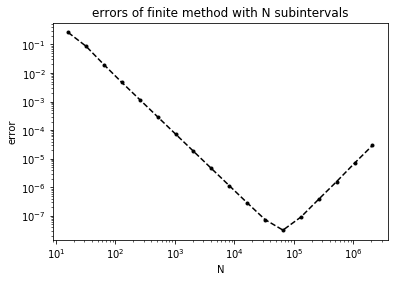

In [11]:
#plotting log errors
plt.loglog(2**np.arange(4,22),errs,'--.',color='k')
plt.title("errors of finite method with N subintervals")
plt.ylabel('error')
plt.xlabel('N')
plt.show()